# Front Matter: CASA0013: Foundations of Spatial Data Science

## Title of Briefing

### Student ID

### Word Count:

# Reproducible Analysis

## Classification of Airbnb penetration in London 

This notebook holds the analysis for the classification of Airbnb penetration in London. 
After a first exploration of the datasets with visualisations that seek to quantify the current picture of Airbnb listings in London, the London wards are classified by their amaount of listings (low, medium, large), followed by a geodemographic classification of the neighboorhods that attempts to identify patterns expaining and perhaps predicting the presence or absense of listings. 

Data used for this analysis were obtained from the following sources:
* Airbnb listings, compiled 10 October 2021: <http://insideairbnb.com/get-the-data.html>
* London Wards data: <https://data.london.gov.uk/dataset/ward-profiles-and-atlas>
* London Wards geography: <https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london>

For ease of access the data has been saved in the following github repository: <https://github.com/DaphneBdn/fsds_cw3>

### Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

Airbnb Data

In [2]:
# Load in the Airbnb data 
df = pd.read_csv('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/raw/listings.csv.gz?raw=true', compression='gzip')
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211010233627,2021-10-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,20211010233627,2021-10-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.79
2,17402,https://www.airbnb.com/rooms/17402,20211010233627,2021-10-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,2,2,0,0,0.35


In [3]:
# extract the column names
cols=df.columns
print(cols)
print(f"The Inside Airbnb dataset has {len(cols)} columns")

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### Investigate NA values

In [4]:
# change settings to display all rows
pd.set_option('display.max_rows', None)
# print out the count of NA values per column
df.isna().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    67903
calendar_updated                                67903
license                                         67903
bathrooms                                       67903
host_response_rate                              34288
host_response_time                              34288
host_acceptance_rate                            33907
host_about                                      30360
neighborhood_overview                           26939
neighbourhood                                   26938
review_scores_value                             20472
review_scores_location                          20468
review_scores_checkin                           20467
review_scores_communication                     20430
review_scores_accuracy                          20427
review_scores_cleanliness                       20415
first_review                                    19028
reviews_per_month                               19028
last_review                 

After inspecting the data the key things to note are: 
* There seem to be no NA values in the longitude and latitude column
* There are xx listings in total
* Date type needs to be adjusted (add here)?
* price column

In [5]:
# change settings back 
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [6]:
# use pandas function replace to replace $ and comma eg $1,000

df["price"]=df.price.str.replace('$','').str.replace(',','').astype('float')
df.head()

/tmp/ipykernel_5420/2720214001.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"]=df.price.str.replace('$','').str.replace(',','').astype('float')


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211010233627,2021-10-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,20211010233627,2021-10-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.79
2,17402,https://www.airbnb.com/rooms/17402,20211010233627,2021-10-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,2,2,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20211010233627,2021-10-12,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,24328,https://www.airbnb.com/rooms/24328,20211010233627,2021-10-12,"Battersea bedroom & studio, parking, shared ga...","Artist house, bright high ceiling rooms, priva...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/c4ffa398-ebfd...,41759,https://www.airbnb.com/users/show/41759,...,4.93,4.58,4.64,NaN,f,1,1,0,0,0.77


In [7]:
# store the columns of interet in a list
sub_cols=['id', 'name',
       'latitude','longitude', 'property_type', 'room_type', 'price',
       'availability_365', 'number_of_reviews_l30d', 'first_review',
       'last_review']

In [8]:
# create a subframe with the stored columns
df= df[sub_cols]
df.set_index('id', inplace=True)
df.head()


,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review
id,,,,,,,,,,
13913,Holiday London DB Room Let-on going,51.56861,-0.11270,Private room in rental unit,Private room,65.0,339,0,2011-07-11,2011-09-13
15400,Bright Chelsea Apartment. Chelsea!,51.48780,-0.16813,Entire rental unit,Entire home/apt,75.0,2,0,2012-07-16,2019-08-10
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,51.52195,-0.14094,Entire rental unit,Entire home/apt,307.0,320,0,2011-09-18,2019-11-02
17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,51.47935,-0.19743,Private room in townhouse,Private room,150.0,364,0,NaN,NaN
24328,"Battersea bedroom & studio, parking, shared ga...",51.47119,-0.16256,Entire townhouse,Entire home/apt,200.0,273,0,2011-11-01,2015-10-24


Convert the dataframe(df) into a geodataframe using the epsg code for the World Geodetic System 1984, then convert to British National Grid 

In [9]:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.longitude, df.latitude, 
                       crs= 'epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

<AxesSubplot:>

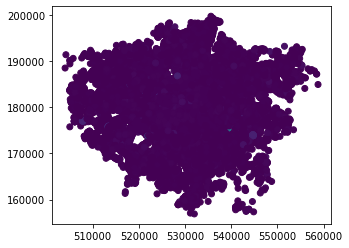

In [10]:
#check the geodataframe with a quick plot
gdf.plot(column="price")

### London Boundary 

create the boundary of London for maps

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

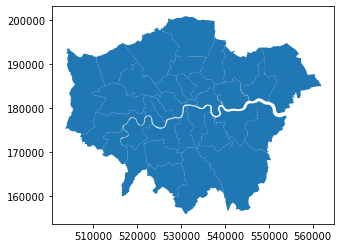

In [14]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros.plot()

In [15]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})


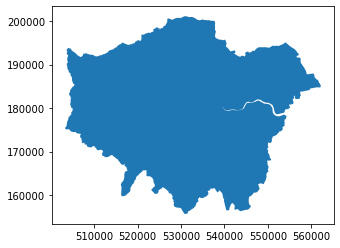

In [16]:
ldn['geometry'] = ldn.original.buffer(200)
ldn = ldn.set_geometry('geometry')
ldn.plot();

Airbnb point map

In [18]:
gdf.head()

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry
id,,,,,,,,,,,
13913,Holiday London DB Room Let-on going,51.56861,-0.11270,Private room in rental unit,Private room,65.0,339,0,2011-07-11,2011-09-13,POINT (530901.013 187213.787)
15400,Bright Chelsea Apartment. Chelsea!,51.48780,-0.16813,Entire rental unit,Entire home/apt,75.0,2,0,2012-07-16,2019-08-10,POINT (527284.576 178129.679)
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,51.52195,-0.14094,Entire rental unit,Entire home/apt,307.0,320,0,2011-09-18,2019-11-02,POINT (529075.790 181974.865)
17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,51.47935,-0.19743,Private room in townhouse,Private room,150.0,364,0,NaN,NaN,POINT (525273.544 177139.513)
24328,"Battersea bedroom & studio, parking, shared ga...",51.47119,-0.16256,Entire townhouse,Entire home/apt,200.0,273,0,2011-11-01,2015-10-24,POINT (527717.629 176292.280)


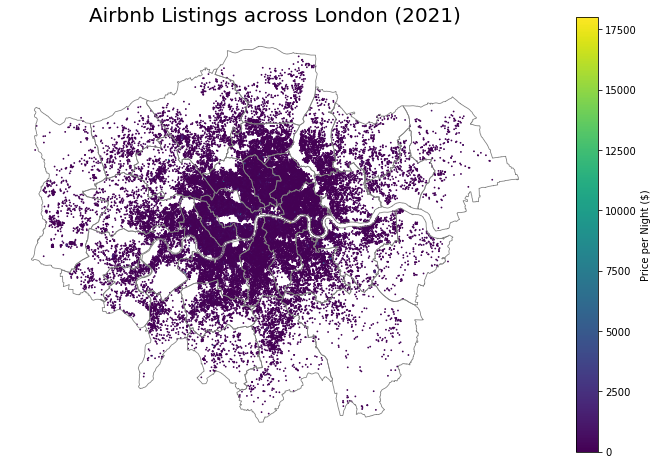

In [17]:
#create a base axis for the plot
fig, ax = plt.subplots(1,1, figsize = (12,8))

#plot the London outline 
boros.boundary.plot(ax=ax, edgecolor = "grey", linewidth=0.8)

#plot the airbnb listings
gdf.plot(ax = ax, column="price", cmap='viridis', markersize = 0.6, legend=True,
         legend_kwds={'label': 'Price per Night ($)'})

#set the axis off
ax.set_axis_off()

#add title
ax.set_title("Airbnb Listings across London (2021)", fontsize = 20)

plt.show()

#plt.savefig("Airbnb_map_dots.png", bbox_inches = 'tight')

In [ ]:
# add comparison with a previous year
# add comparison with actieve listings
# add density per Borough or msoa?

In order to filter out the active listings , this analysis will consider the review as indicator. 
Any review in the past year from the date the data was compiled (2021-10-10) will deem the listing active

In [23]:
gdf.sample(4, random_state=42)

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry
id,,,,,,,,,,,
42409608,Cosy two bedroom home full of character,51.43951,-0.19965,Entire rental unit,Entire home/apt,100.0,0,0,NaN,NaN,POINT (525228.295 172705.369)
39318693,Frills-free yet Clean and Comfortable Bedroom,51.51699,-0.06882,Private room in condominium (condo),Private room,17.0,0,0,2019-10-25,2019-10-27,POINT (534093.520 181552.877)
29555250,Unmissable Luxurious Mews House in Central London,51.49980,-0.14976,Entire residential home,Entire home/apt,625.0,200,0,2019-01-11,2018-12-19,POINT (528526.190 179496.193)
19248360,Wonderful Private room+tea/coffee&sweets,51.53640,0.01036,Private room in rental unit,Private room,25.0,0,0,2017-06-25,2018-10-11,POINT (539527.700 183859.253)


In [24]:
print(f"gdf now contains {gdf.shape[0]} rows.")

gdf now contains 67903 rows.


In [25]:
# first drop the NaN values fro the "last review" column
gdf.drop(gdf[gdf.last_review.isna()].index.values, axis=0, inplace=True)


In [26]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48875 entries, 13913 to 52669884
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   name                    48867 non-null  object  
 1   latitude                48875 non-null  float64 
 2   longitude               48875 non-null  float64 
 3   property_type           48875 non-null  object  
 4   room_type               48875 non-null  object  
 5   price                   48875 non-null  float64 
 6   availability_365        48875 non-null  int64   
 7   number_of_reviews_l30d  48875 non-null  int64   
 8   first_review            48875 non-null  object  
 9   last_review             48875 non-null  object  
 10  geometry                48875 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 4.5+ MB


In [27]:
gdf["last_review "]= pd.to_datetime(gdf["last_review"], format='%Y-%m-%d')

In [28]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48875 entries, 13913 to 52669884
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    48867 non-null  object        
 1   latitude                48875 non-null  float64       
 2   longitude               48875 non-null  float64       
 3   property_type           48875 non-null  object        
 4   room_type               48875 non-null  object        
 5   price                   48875 non-null  float64       
 6   availability_365        48875 non-null  int64         
 7   number_of_reviews_l30d  48875 non-null  int64         
 8   first_review            48875 non-null  object        
 9   last_review             48875 non-null  object        
 10  geometry                48875 non-null  geometry      
 11  last_review             48875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3

In [29]:
# Filter for active listings
active_gdf = gdf.loc[gdf["last_review"] >= '2020-10-10']

# Display
active_gdf.sample(4, random_state=42)

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry,last_review
id,,,,,,,,,,,,
7019406,Spacious Classy Portobello Apartment,51.52359,-0.20824,Entire rental unit,Entire home/apt,170.0,365,0,2018-08-06,2021-06-29,POINT (524402.487 182040.773),2021-06-29
51033334,Superb 1 Bed Flat - Brick Lane (Free Parking),51.52397,-0.06481,Entire condominium (condo),Entire home/apt,110.0,0,1,2021-07-26,2021-10-04,POINT (534351.206 182336.422),2021-10-04
47173303,Beautiful room in Little Venice,51.52274,-0.19467,Private room in condominium (condo),Private room,40.0,11,0,2020-12-27,2021-05-25,POINT (525346.187 181969.387),2021-05-25
26120791,Clean and Spacious Balcony Room - 15m to Hyde ...,51.53076,-0.18641,Private room in rental unit,Private room,50.0,115,0,2018-07-16,2021-07-24,POINT (525897.098 182875.417),2021-07-24


In [30]:
print(f"active_gdf contains {active_gdf.shape[0]} rows.")

active_gdf contains 13577 rows.


### Comparison map 

NOTE: change colours

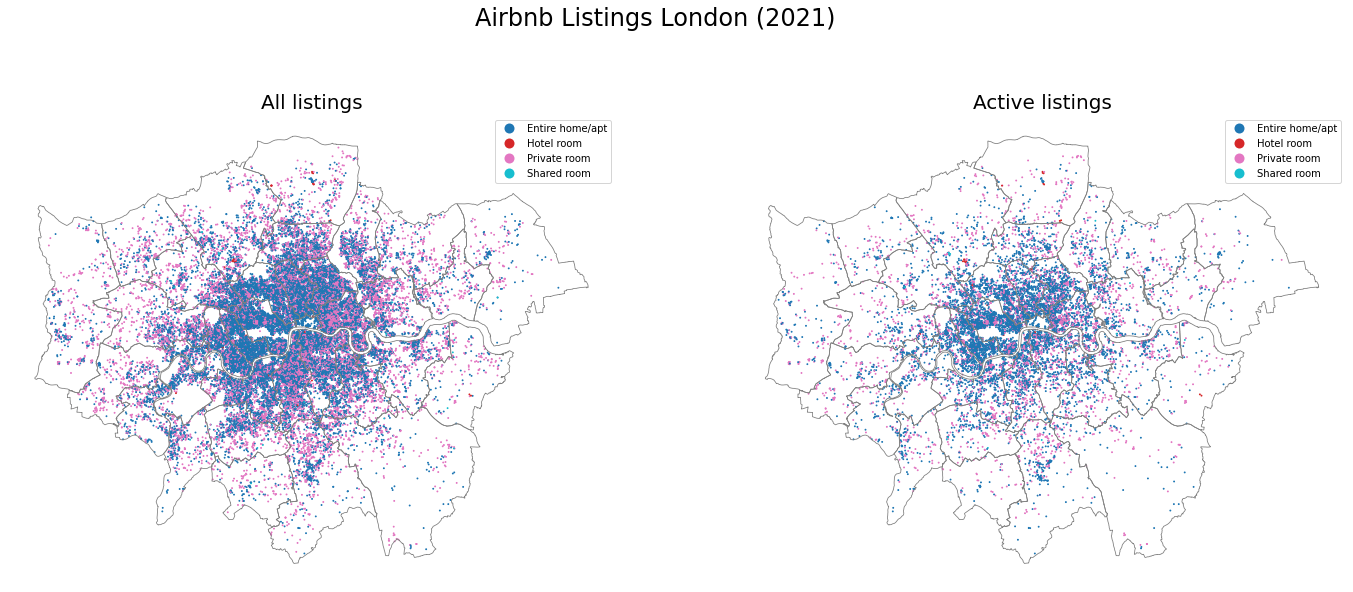

In [39]:
#create a base axis for the plot
fig, axes = plt.subplots(1,2, figsize = (24,16))

plt1 = 'All listings'
plt2 = 'Active listings'

#plot the London outline 
boros.boundary.plot(ax=axes[0], edgecolor = "grey", linewidth=0.8)
#plot the airbnb listings
gdf.plot(ax = axes[0], column="room_type" , cmap='tab10', markersize = 0.8, legend=True)

#plot the London outline 
boros.boundary.plot(ax=axes[1], edgecolor = "grey", linewidth=0.8)
#plot the active airbnb listings
active_gdf.plot(ax = axes[1], column="room_type", cmap='tab10', markersize = 0.8, legend=True)


#set the axis off
for ax in axes:
    ax.axis('off')

#add title

fig.suptitle('Airbnb Listings London (2021)', y=0.8,ha='center', size=24)
axes[0].set_title(plt1.capitalize(), size=20)
axes[1].set_title(plt2.capitalize(), size=20)

#plt.show()

plt.savefig("Active_Airbnb_map_comparison_dots.png", bbox_inches = 'tight')

In [ ]:
### London Spatial Units (MSOAS)

<AxesSubplot:>

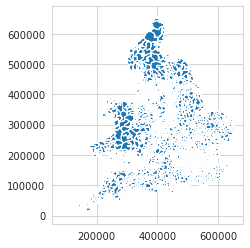

In [45]:
# Load in the MSOA data from the practicals. Tried using the file in uploaded to github repo, but it didnt work.
msoas = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')
msoas.plot()

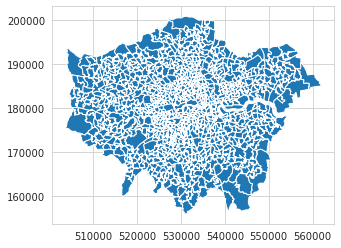

In [46]:
ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();

In [47]:
# delete the UK msoa data
del(msoas)

In [48]:
ldn_msoas.head()

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,index_right,original
0,1,E02000001,City of London 001,City of London 001,532384,181355,-0.093490,51.51561,2.906361e+06,8936.818478,"POLYGON ((532135.138 182198.131, 532158.250 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,548267,189685,0.138756,51.58652,2.166163e+06,8150.405928,"POLYGON ((548881.563 190845.265, 548881.125 19...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,548259,188520,0.138149,51.57605,2.143568e+06,9118.196243,"POLYGON ((549102.438 189324.625, 548954.517 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,551004,186412,0.176828,51.55638,2.491467e+06,8206.551627,"POLYGON ((551550.056 187364.705, 551478.000 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,548733,186824,0.144267,51.56069,1.186053e+06,6949.688798,"POLYGON ((549099.634 187656.076, 549161.375 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."


In [49]:
# tidy up the msoas 
keep= ["MSOA11CD", "MSOA11NM","Shape__Are","geometry"]
ldn_msoas= ldn_msoas[keep]
ldn_msoas.head()

,MSOA11CD,MSOA11NM,Shape__Are,geometry
0,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18..."
1,E02000002,Barking and Dagenham 001,2.166163e+06,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,2.143568e+06,"POLYGON ((549102.438 189324.625, 548954.517 18..."
3,E02000004,Barking and Dagenham 003,2.491467e+06,"POLYGON ((551550.056 187364.705, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,1.186053e+06,"POLYGON ((549099.634 187656.076, 549161.375 18..."


<AxesSubplot:>

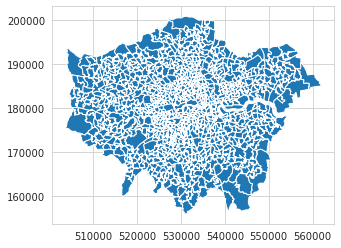

In [50]:
ldn_msoas.plot()

In [51]:
gdf.head()

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry,last_review
id,,,,,,,,,,,,
13913,Holiday London DB Room Let-on going,51.56861,-0.11270,Private room in rental unit,Private room,65.0,339,0,2011-07-11,2011-09-13,POINT (530901.013 187213.787),2011-09-13
15400,Bright Chelsea Apartment. Chelsea!,51.48780,-0.16813,Entire rental unit,Entire home/apt,75.0,2,0,2012-07-16,2019-08-10,POINT (527284.576 178129.679),2019-08-10
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,51.52195,-0.14094,Entire rental unit,Entire home/apt,307.0,320,0,2011-09-18,2019-11-02,POINT (529075.790 181974.865),2019-11-02
24328,"Battersea bedroom & studio, parking, shared ga...",51.47119,-0.16256,Entire townhouse,Entire home/apt,200.0,273,0,2011-11-01,2015-10-24,POINT (527717.629 176292.280),2015-10-24
25123,Clean big Room in London (Room 1),51.57438,-0.21081,Private room in residential home,Private room,29.0,0,0,2010-09-01,2018-08-06,POINT (524086.053 187684.528),2018-08-06


### listings per msoa

In [121]:
joined = gpd.sjoin(gdf, ldn_msoas, how='right', op='within')
joined.head()

,index_left,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,last_review,MSOA11CD,MSOA11NM,Shape__Are,geometry
0,16688976.0,Amazing flat near Tower Bridge,51.51061,-0.07319,Entire rental unit,Entire home/apt,67.0,0.0,0.0,2017-10-24,2018-07-08,2018-07-08,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18..."
0,44654884.0,Special Modern One Bedroom in the City of London!,51.51098,-0.07381,Entire rental unit,Entire home/apt,110.0,266.0,0.0,2021-05-08,2021-05-08,2021-05-08,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18..."
0,16836451.0,Beautiful apartment in the City of London,51.51100,-0.07332,Entire rental unit,Entire home/apt,95.0,241.0,0.0,2017-09-12,2017-09-12,2017-09-12,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18..."
0,24806405.0,Double room with private bathroom at Tower Bridge,51.51106,-0.07364,Private room in condominium (condo),Private room,92.0,0.0,0.0,2018-05-19,2018-12-09,2018-12-09,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18..."
0,10064124.0,The Tower Luxury Studio & Sofa Bed - Best Area,51.51113,-0.07288,Entire serviced apartment,Entire home/apt,90.0,291.0,2.0,2016-04-23,2018-02-01,2018-02-01,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18..."


In [122]:
#insert new columns

# count of listings per msoa
joined["listings_count"]=joined.groupby(["MSOA11CD"])["index_left"].transform("count")

In [127]:
#calculate density of listings per ward

joined["listings_density"]=joined["listings_count"]/joined["Shape__Are"]*10000
joined.head()


,index_left,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,last_review,MSOA11CD,MSOA11NM,Shape__Are,geometry,listings_count,listings_density
0,16688976.0,Amazing flat near Tower Bridge,51.51061,-0.07319,Entire rental unit,Entire home/apt,67.0,0.0,0.0,2017-10-24,2018-07-08,2018-07-08,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18...",249,0.856741
0,44654884.0,Special Modern One Bedroom in the City of London!,51.51098,-0.07381,Entire rental unit,Entire home/apt,110.0,266.0,0.0,2021-05-08,2021-05-08,2021-05-08,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18...",249,0.856741
0,16836451.0,Beautiful apartment in the City of London,51.51100,-0.07332,Entire rental unit,Entire home/apt,95.0,241.0,0.0,2017-09-12,2017-09-12,2017-09-12,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18...",249,0.856741
0,24806405.0,Double room with private bathroom at Tower Bridge,51.51106,-0.07364,Private room in condominium (condo),Private room,92.0,0.0,0.0,2018-05-19,2018-12-09,2018-12-09,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18...",249,0.856741
0,10064124.0,The Tower Luxury Studio & Sofa Bed - Best Area,51.51113,-0.07288,Entire serviced apartment,Entire home/apt,90.0,291.0,2.0,2016-04-23,2018-02-01,2018-02-01,E02000001,City of London 001,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18...",249,0.856741


In [128]:
#Some msoas have no listings which will result in 0 values 
(joined['listings_count']==0).sum()

5

In [129]:
joined.loc[joined['listings_count']==0]

,index_left,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,last_review,MSOA11CD,MSOA11NM,Shape__Are,geometry,listings_count,listings_density
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000161,Bromley 035,1.725063e+06,"POLYGON ((545600.775 165674.398, 545702.779 16...",0,0.0
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000229,Croydon 036,1.322178e+06,"POLYGON ((538964.976 162500.106, 538977.000 16...",0,0.0
459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000478,Havering 015,2.486474e+06,"POLYGON ((554425.877 189182.586, 554381.056 18...",0,0.0
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000498,Hillingdon 005,3.143722e+06,"POLYGON ((507930.801 189781.169, 508161.678 18...",0,0.0
817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000848,Sutton 009,1.154120e+06,"POLYGON ((524013.202 165651.568, 524025.533 16...",0,0.0


In [130]:
# change the 0 values to 0.0001 in the listings_density columns so that log transformation will work

for x in joined.loc[joined['listings_count']==0].index:
    joined.at[x,"listings_density"]=0.0001

In [131]:
# check it worked
joined.loc[joined['listings_count']==0]

,index_left,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,last_review,MSOA11CD,MSOA11NM,Shape__Are,geometry,listings_count,listings_density
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000161,Bromley 035,1.725063e+06,"POLYGON ((545600.775 165674.398, 545702.779 16...",0,0.0001
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000229,Croydon 036,1.322178e+06,"POLYGON ((538964.976 162500.106, 538977.000 16...",0,0.0001
459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000478,Havering 015,2.486474e+06,"POLYGON ((554425.877 189182.586, 554381.056 18...",0,0.0001
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000498,Hillingdon 005,3.143722e+06,"POLYGON ((507930.801 189781.169, 508161.678 18...",0,0.0001
817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,E02000848,Sutton 009,1.154120e+06,"POLYGON ((524013.202 165651.568, 524025.533 16...",0,0.0001


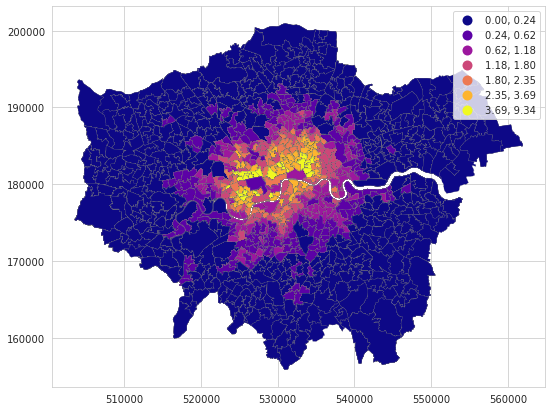

In [132]:
sns.set_style('whitegrid')
#ax = wards_total.plot(facecolor=(0.8, 0.8, 0.8, 0.5), edgecolor='gray', linewidth=0.25, figsize=(10,10))
#gdf_total.plot(ax=ax, column='list_density', cmap='viridis', edgecolor='none', legend=True);


# basic map 

joined.plot(column='listings_density', cmap='plasma', 
         scheme='quantiles', k=7, edgecolor='grey',linewidth=0.2, legend=True, figsize=(9,7));

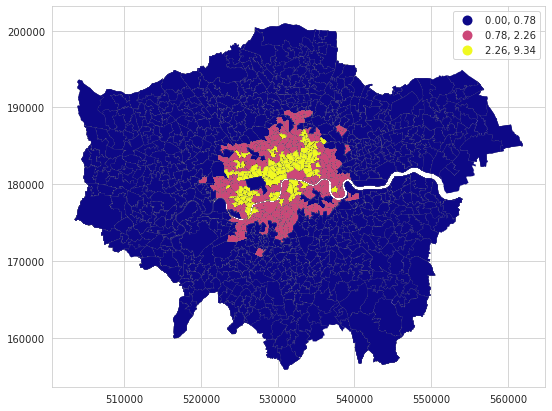

In [59]:

sns.set_style('whitegrid')

joined.plot(column='listings_density', cmap='plasma', 
         scheme='quantiles', k=3, edgecolor='grey',linewidth=0.1, legend=True, figsize=(9,7));


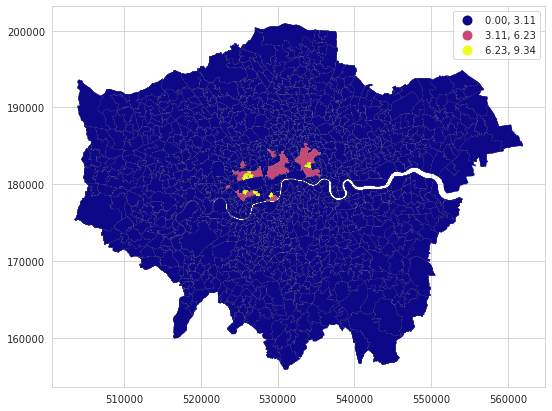

In [67]:

sns.set_style('whitegrid')

joined.plot(column='listings_density', cmap='plasma', 
         scheme='equalinterval', k=3, edgecolor='grey',linewidth=0.1, legend=True, figsize=(9,7));


In [ ]:
Invalid scheme. Scheme must be in the set: dict_keys(['boxplot', 
                                                      'equalinterval',
                                                      'fisherjenks',
                                                      'fisherjenkssampled', 
                                                      'headtailbreaks', 
                                                      'jenkscaspall', 
                                                      'jenkscaspallforced',
                                                      'jenkscaspallsampled',
                                                      'maxp',
                                                      'maximumbreaks',
                                                      'naturalbreaks', 
                                                      'quantiles', 
                                                      'percentiles', 
                                                      'stdmean', 
                                                      'userdefined']

<Axes:>

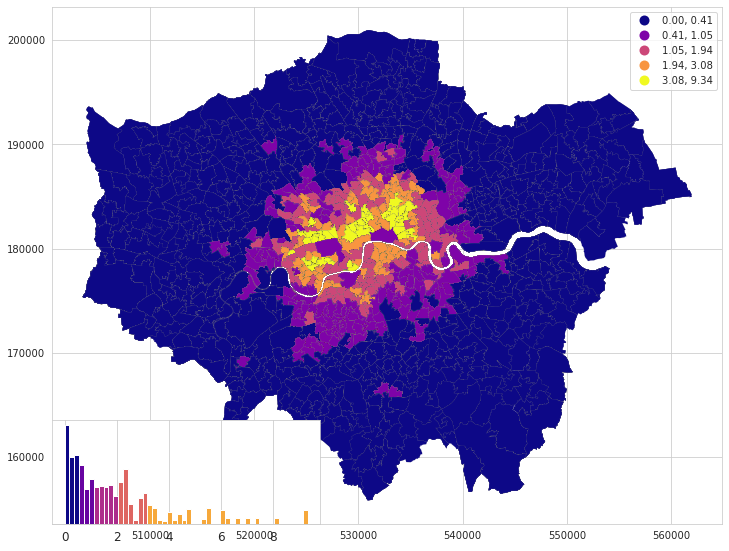

In [69]:
import pysal as ps
# https://github.com/pysal/mapclassify
import mapclassify as mc
# https://jiffyclub.github.io/palettable/
import palettable.matplotlib as palmpl
from legendgram import legendgram

f,ax = plt.subplots(figsize=(12,10))
joined.plot(column='listings_density', scheme='quantiles', cmap='plasma',edgecolor='grey',linewidth=0.1, k=5, ax=ax, legend=True)
q = mc.Quantiles(joined.listings_density.values, k=5)

# https://github.com/pysal/legendgram/blob/master/legendgram/legendgram.py
legendgram(f, ax, 
               joined.listings_density, q.bins, pal=palmpl.Plasma_5,
               legend_size=(.4,.2), # legend size in fractions of the axis
               loc = 'lower left', # mpl-style legend loc
              # clip = (0,500), # clip range of the histogram
               frameon=True)

In [74]:
joined.listings_density.isnull().sum()


0

<AxesSubplot:ylabel='Frequency'>

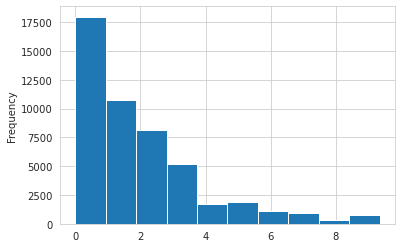

In [133]:
joined['listings_density'].plot.hist() # histogram

In [134]:
joined["ln_listings_density"]= np.log(joined["listings_density"])

<AxesSubplot:ylabel='Frequency'>

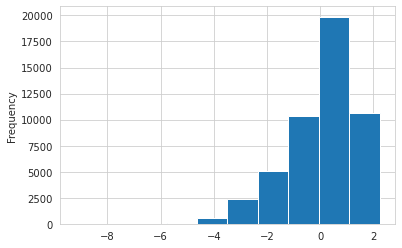

In [135]:
joined['ln_listings_density'].plot.hist() # histogram

<Axes:>

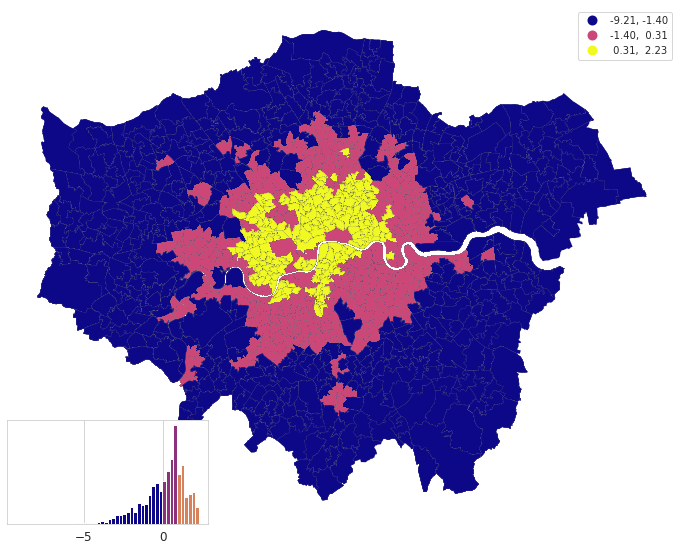

In [148]:
import pysal as ps
# https://github.com/pysal/mapclassify
import mapclassify as mc
# https://jiffyclub.github.io/palettable/
import palettable.matplotlib as palmpl
from legendgram import legendgram

f,ax = plt.subplots(figsize=(12,10))
joined.plot(column='ln_listings_density', scheme='naturalbreaks', cmap='plasma',edgecolor='grey',linewidth=0.1, k=3, ax=ax, legend=True)
q = mc.Quantiles(joined.ln_listings_density.values, k=3)
#set the axis off
ax.set_axis_off()
# https://github.com/pysal/legendgram/blob/master/legendgram/legendgram.py
legendgram(f, ax, 
               joined.ln_listings_density, q.bins, pal=palmpl.Plasma_3,
               legend_size=(.3,.2), # legend size in fractions of the axis
               loc = 'lower left', # mpl-style legend loc
              # clip = (0,500), # clip range of the histogram
               frameon=True)
plt.savefig("Airbnb_density.png", bbox_inches = 'tight')


In [ ]:
------------------------------------------------

In [77]:
dataloc_msoas = os.path.join("Data","raw", "statistical-gis-boundaries-london","ESRI", "MSOA_2011_London_gen_MHW.shp")
print(dataloc_msoas)

Data/raw/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp


<AxesSubplot:>

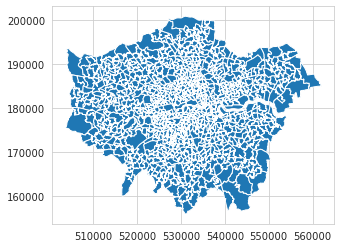

In [78]:
msoas_test = gpd.read_file( dataloc_msoas )
msoas_test.plot()

# add river!!


In [79]:
wards = wards.to_crs('epsg:27700')

NameError: name 'wards' is not defined

In [80]:
msoas_test.describe()

,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,8315.301119,8213.326551,101.974568,83.421668,3322.658189,2.506511
std,1448.361564,1448.464304,207.389350,47.997092,680.489664,0.332978
min,5184.000000,5184.000000,0.000000,2.900000,2031.000000,1.600000
25%,7337.500000,7240.500000,9.000000,47.450000,2850.000000,2.300000
50%,8156.000000,8064.000000,42.000000,72.900000,3212.000000,2.500000
75%,9110.000000,9002.000000,106.000000,115.550000,3746.500000,2.700000
max,14719.000000,14657.000000,2172.000000,247.200000,5936.000000,3.900000


In [81]:
msoas_test.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."
